In [6]:
import ipywidgets as widgets
import time
import pandas as pd
import matplotlib.pyplot as plt


origindf = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
testerdf = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

del origindf["Ticket"], origindf["PassengerId"], origindf["Parch"], origindf["SibSp"], origindf["Fare"], origindf["Cabin"], \
    origindf["Embarked"], origindf["Pclass"]


def alive_filter(life_status, df):
    if str(life_status) == "alive":
        df = df[df['Survived'] == 1]
        return df
    elif str(life_status) == "dead":
        df = df[df['Survived'] == 0]
        return df
    else:
        print("bad value")


def age_filter(age_range, df):
    df = df[(df['Age'].isin(age_range))]
    return df


def gender_filter(gender, df):
    if str(gender) == "male":
        df = df[df['Sex'] == "male"]
        print(df)
        return df
    elif str(gender) == "female":
        df = df[df['Sex'] == "female"]
        return df
    else:
        print("bad value")
        
a = widgets.Checkbox(
    value=False,
    description='Mortality Filter',
    disabled=False,
    indent=False
)
b = widgets.Checkbox(
    value=False,
    description='Age Filter',
    disabled=False,
    indent=False
)
c = widgets.Checkbox(
    value=False,
    description='Gender Filter',
    disabled=False,
    indent=False
)
display(a)
display(b)
display(c)
input("type anything to continue after checking the right boxes: ")


Checkbox(value=False, description='Mortality Filter', indent=False)

Checkbox(value=False, description='Age Filter', indent=False)

Checkbox(value=False, description='Gender Filter', indent=False)

type anything to continue after checking the right boxes: c


'c'

In [7]:
if a.value == True:
    origindf = alive_filter(input("alive or dead: "), origindf)

if b.value == True:
    minage = input("min age: ")
    maxage = input("max age: ")
    origindf = age_filter(range(int(minage),(int(maxage)+1)), origindf)

what_gender = 1
if c.value == True:
    what_gender = input("male or female: ")
    origindf = gender_filter(str(what_gender), origindf)

male or female: male
     Survived                            Name   Sex   Age
0           0         Braund, Mr. Owen Harris  male  22.0
4           0        Allen, Mr. William Henry  male  35.0
5           0                Moran, Mr. James  male   NaN
6           0         McCarthy, Mr. Timothy J  male  54.0
7           0  Palsson, Master. Gosta Leonard  male   2.0
..        ...                             ...   ...   ...
883         0   Banfield, Mr. Frederick James  male  28.0
884         0          Sutehall, Mr. Henry Jr  male  25.0
886         0           Montvila, Rev. Juozas  male  27.0
889         1           Behr, Mr. Karl Howell  male  26.0
890         0             Dooley, Mr. Patrick  male  32.0

[577 rows x 4 columns]


     Survived                            Name   Sex   Age
0           0         Braund, Mr. Owen Harris  male  22.0
4           0        Allen, Mr. William Henry  male  35.0
5           0                Moran, Mr. James  male   NaN
6           0         McCarthy, Mr. Timothy J  male  54.0
7           0  Palsson, Master. Gosta Leonard  male   2.0
..        ...                             ...   ...   ...
883         0   Banfield, Mr. Frederick James  male  28.0
884         0          Sutehall, Mr. Henry Jr  male  25.0
886         0           Montvila, Rev. Juozas  male  27.0
889         1           Behr, Mr. Karl Howell  male  26.0
890         0             Dooley, Mr. Patrick  male  32.0

[577 rows x 4 columns]


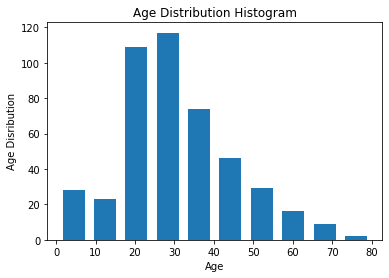

,Survived
Sex,
male,0.188908


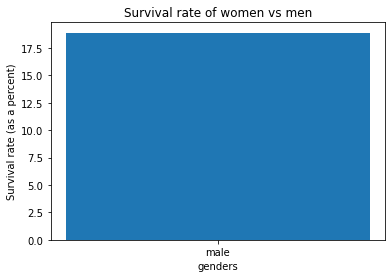

In [9]:
print(origindf)


plt.hist(origindf.Age, rwidth=0.7)
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()


piedf = origindf.groupby(['Sex'], group_keys=False).mean()[['Survived']]
display(piedf)
if what_gender == 1:
    piedf.Survived[0] = piedf.Survived[0] * 100
    piedf.Survived[1] = piedf.Survived[1] * 100
    data = {'female': piedf.Survived['female'], 'male': piedf.Survived['male']}
elif what_gender == "male":
    piedf.Survived['male'] = piedf.Survived['male'] * 100
    data = {'male': piedf.Survived['male']}
elif what_gender == "female":
    piedf.Survived['female'] = piedf.Survived['female'] * 100
    data = {'female': piedf.Survived['female']}
    

genderkeys = list(data.keys())
values = list(data.values())
   
plt.bar(genderkeys, values)
 
plt.xlabel("genders")
plt.ylabel("Survival rate (as a percent)")
plt.title("Survival rate of women vs men")
plt.show()